<a href="https://colab.research.google.com/github/disuja7/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Book Recommendation System </u></b>

**Project type** - Unsupervised ML

**Contribution** - 

Github link - 

**Index :**

1. [Problem Description](#s1)
2. [Data Description](#s2)
3. [Importing dataset and the libraries](#s3)
4. [Understanding the data](#s4)
5. [Data cleaning and basic feature engineering](#s5)
6. [Exploratory data analysis](#s6)
7. [Data Preprocessing](#s7)
8. [Model Selection](#s8)
9. [Model Implementation](#s9)
10. [Model Explainability](#s10)
11. [Summary and conclusions](#s11)



<a name="s1"></a>
## <b>1. Introduction & Problem Description </b>

During the last few decades, with the rise
of Youtube, Amazon, Netflix, and many
other such web services, recommender
systems have taken more and more place
in our lives. From e-commerce (suggest to
buyers articles that could interest them)
to online advertisement (suggest to users
the right contents, matching their
preferences), recommender systems are
today unavoidable in our daily online
journeys.
In a very general way, recommender
systems are algorithms aimed at
suggesting relevant.
items to users (items being movies to
watch, text to read, products to buy, or
anything else depending on industries).
Recommender systems are really critical
in some industries as they can generate a
huge amount of income when they are
efficient or also be a way to stand out
significantly from competitors. The main
objective is to create a book
recommendation system for users.

### **Businees Goal**
We are required to do basic EDA on the given data for the Amazon web services and analyse some insights from it.
Finally we have to use recommendation system to recommend the unexplored books to the users.

<a name="s2"></a>
## <b>2. Data Description </b>


**The Book-Crossing dataset comprises 3
files.**

**Users:**
Contains the users. Note that user IDs
(User-ID) have been anonymized and map
to integers. Demographic data is provided
(Location, Age) if available. Otherwise,
these fields contain NULL values.

**Books:**
Books are identified by their respective
ISBN. Invalid ISBNs have already been
removed from the dataset. Moreover,
some content-based information is given
(Book-Title, Book-Author, Year-OfPublication, Publisher), obtained from
Amazon Web Services. Note that in the
case of several authors, only the first is
provided. URLs linking to cover images are
also given, appearing in three different
flavours (Image-URL-S, Image-URL-M,
Image-URL-L), i.e., small, medium, large.
These URLs point to the Amazon website.

**Ratings:**
Contains the book rating information.
Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher
values denoting higher appreciation).

<a name="s3"></a>
## <b>3.Importing dataset and the libraries </b>

In [1]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
users_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Users.csv")

In [4]:
books_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Books.csv")

In [5]:
ratings_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Ratings.csv")

In [6]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users_df.shape

(278858, 3)

In [8]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
users_df.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [10]:
# checking for null values
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
# checking for duplicate
len(users_df[users_df.duplicated()])

0

**Age distribution**

In [12]:
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [13]:
#creating copy of data
age_df = users_df.copy()

In [14]:
age_df = age_df[(age_df['Age']>=10) & (age_df['Age']<=90)]

<function matplotlib.pyplot.show(*args, **kw)>

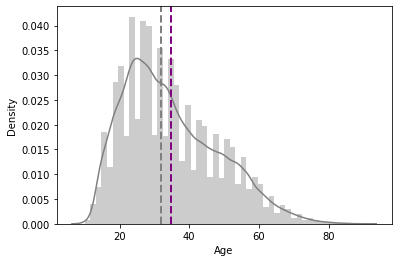

In [15]:
sns.distplot(age_df['Age'],color = 'grey')
plt.axvline((age_df['Age']).median(), color='grey', linestyle='dashed', linewidth=2)
plt.axvline((age_df['Age']).mean(), color='purple', linestyle='dashed', linewidth=2)
plt.show

**We will replace the null values of age to its median on the original dataset.**

In [16]:
users_df['Age'].fillna(int(age_df['Age'].median()), inplace=True)

In [18]:
users_df = users_df[(users_df['Age']>=10) & (users_df['Age']<=90)]

In [19]:
users_df.shape

(277359, 3)

In [20]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277359 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   277359 non-null  int64  
 1   Location  277359 non-null  object 
 2   Age       277359 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.5+ MB


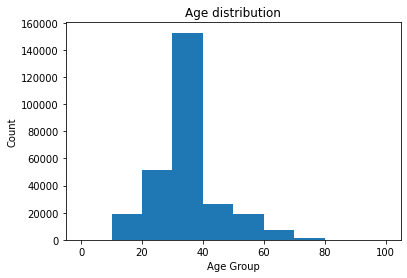

In [21]:
plt.hist(users_df['Age'], bins=[0, 10, 20, 30, 40,50,60,70,80,90,100])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

In [30]:
len(users_df['Location'].unique())

57067

In [54]:

users_df['Country'] =  users_df.apply(lambda row: row['Location'].split()[-1],axis=1)

In [55]:
users_df.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",32.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",32.0,kingdom


In [60]:
users_df['Country'].value_counts().head(10)

usa          139140
canada        21579
kingdom       18417
germany       16934
spain         13059
australia     11675
italy         11209
france         3465
portugal       3288
zealand        3075
Name: Country, dtype: int64

In [59]:
len(users_df['Country'].unique())

1060

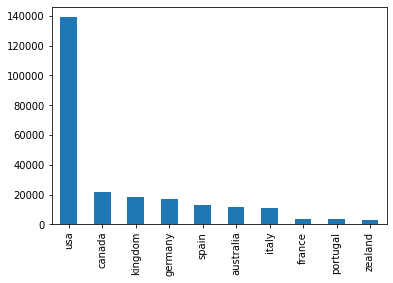

In [64]:
users_df['Country'].value_counts().head(10).plot(kind='bar')

### **Books Dataset**

In [65]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [68]:
books_df.shape

(271360, 8)

In [70]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [67]:
books_df['Year-Of-Publication'].describe()

count     271360
unique       202
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64